In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Načítanie dát zo súborov
file_paths = {
    "GPT True Results": "vysledky_analyzy_gpt_true.csv",
    "Gemini Results": "vysledky_analyzy_gemini.csv",
    "Gemini True Results": "vysledky_analyzy_gemini_true.csv",
    "GPT Results": "vysledky_analyzy_gpt.csv",
}

# Načítanie datasetov do slovníka
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Normalizácia názvov nástrojov (malé písmená a odstránenie medzier)
for df in dataframes.values():
    df["nastroj"] = df["nastroj"].str.lower().str.strip()

# Výpočet priemerného času vykonania pre každý nástroj naprieč všetkými datasetmi
avg_time_overall = (
    pd.concat([df.groupby("nastroj")["cas_vykonania"].mean().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["cas_vykonania"].mean()
    .reset_index()
)

# Výpočet celkového počtu detegovaných chýb pre každý nástroj naprieč všetkými datasetmi
total_errors_overall = (
    pd.concat([df.groupby("nastroj")["pocet_chyb"].sum().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["pocet_chyb"].sum()
    .reset_index()
)

# Zoradenie dát pre lepšiu vizualizáciu
avg_time_overall = avg_time_overall.sort_values("nastroj")
total_errors_overall = total_errors_overall.sort_values("nastroj")

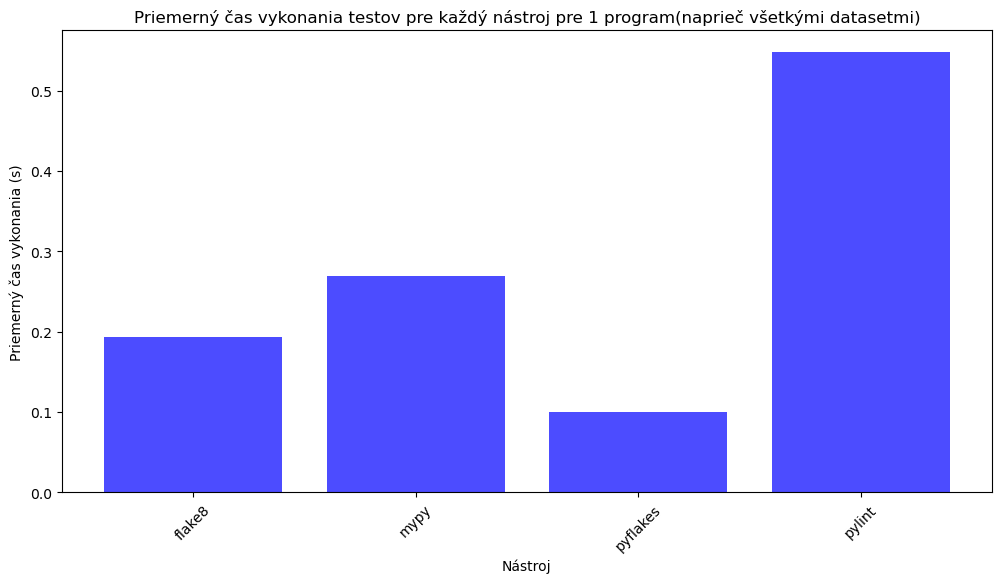

In [44]:
# Graf 1: Priemerný čas vykonania pre každý nástroj
plt.figure(figsize=(12, 6))
plt.bar(avg_time_overall["nastroj"], avg_time_overall["cas_vykonania"], color="blue", alpha=0.7)
plt.xlabel("Nástroj")
plt.ylabel("Priemerný čas vykonania (s)")
plt.title("Priemerný čas vykonania testov pre každý nástroj pre 1 program(naprieč všetkými datasetmi)")
plt.xticks(rotation=45)
plt.show()

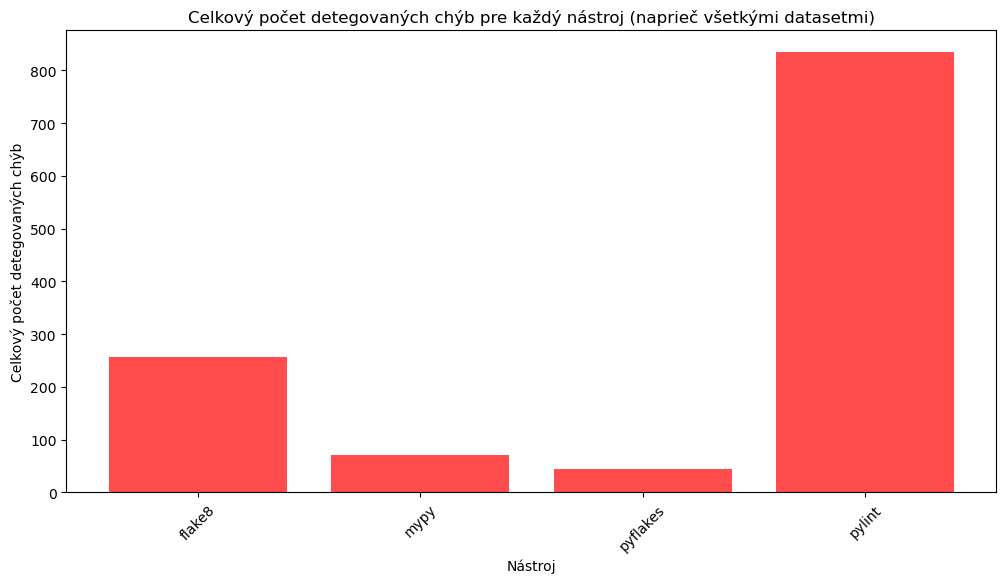

In [46]:
# Graf 2: Celkový počet detegovaných chýb pre každý nástroj
plt.figure(figsize=(12, 6))
plt.bar(total_errors_overall["nastroj"], total_errors_overall["pocet_chyb"], color="red", alpha=0.7)
plt.xlabel("Nástroj")
plt.ylabel("Celkový počet detegovaných chýb")
plt.title("Celkový počet detegovaných chýb pre každý nástroj (naprieč všetkými datasetmi)")
plt.xticks(rotation=45)
plt.show()

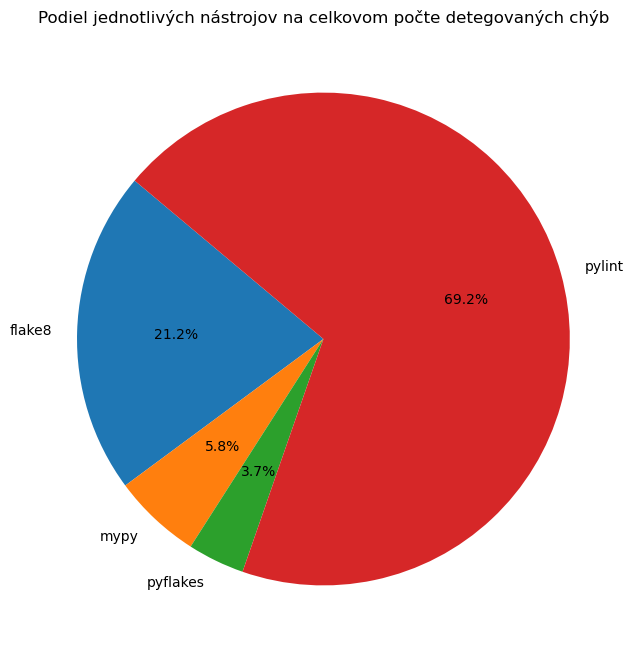

In [48]:
# Výpočet celkového počtu detegovaných chýb
total_errors_pie = total_errors_overall.set_index("nastroj")["pocet_chyb"]

# Vytvorenie pie chartu
plt.figure(figsize=(8, 8))
plt.pie(total_errors_pie, labels=total_errors_pie.index, autopct="%1.1f%%", startangle=140)
plt.title("Podiel jednotlivých nástrojov na celkovom počte detegovaných chýb")
plt.show()

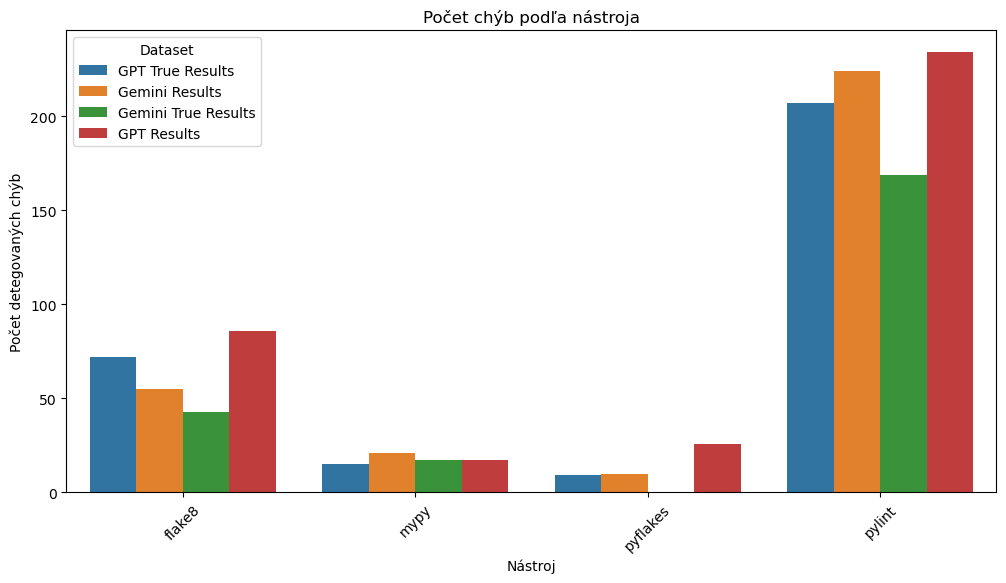

In [52]:
# Výpočet počtu chýb pre jednotlivé datasetové skupiny
import seaborn as sns
dataset_errors = pd.concat(
    [df.groupby("nastroj")["pocet_chyb"].sum().reset_index().assign(dataset=name) for name, df in dataframes.items()]
)

# Vykreslenie bar chartu
plt.figure(figsize=(12, 6))
sns.barplot(x="nastroj", y="pocet_chyb", hue="dataset", data=dataset_errors)
plt.xlabel("Nástroj")
plt.ylabel("Počet detegovaných chýb")
plt.title("Počet chýb podľa nástroja")
plt.xticks(rotation=45)
plt.legend(title="Dataset")
plt.show()

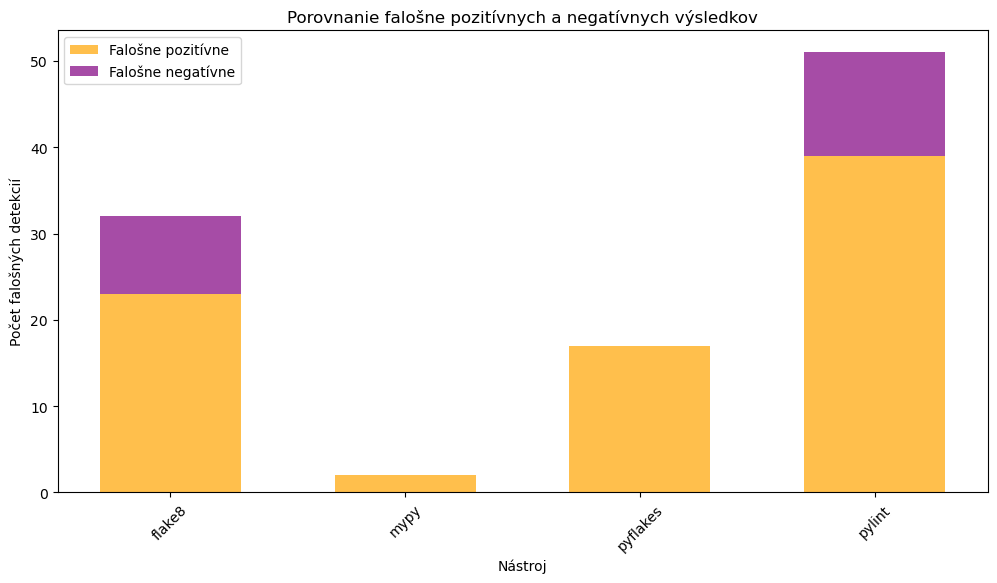

In [29]:
import numpy as np

# Nastavenie veľkosti grafu
plt.figure(figsize=(12, 6))

# Stacked bar chart pre FP a FN
bar_width = 0.6
index = np.arange(len(false_values["nastroj"]))

plt.bar(index, false_values["false_positives"], bar_width, label="Falošne pozitívne", color="orange", alpha=0.7)
plt.bar(index, false_values["false_negatives"], bar_width, bottom=false_values["false_positives"], label="Falošne negatívne", color="purple", alpha=0.7)

plt.xlabel("Nástroj")
plt.ylabel("Počet falošných detekcií")
plt.title("Porovnanie falošne pozitívnych a negatívnych výsledkov")
plt.xticks(index, false_values["nastroj"], rotation=45)
plt.legend()
plt.show()


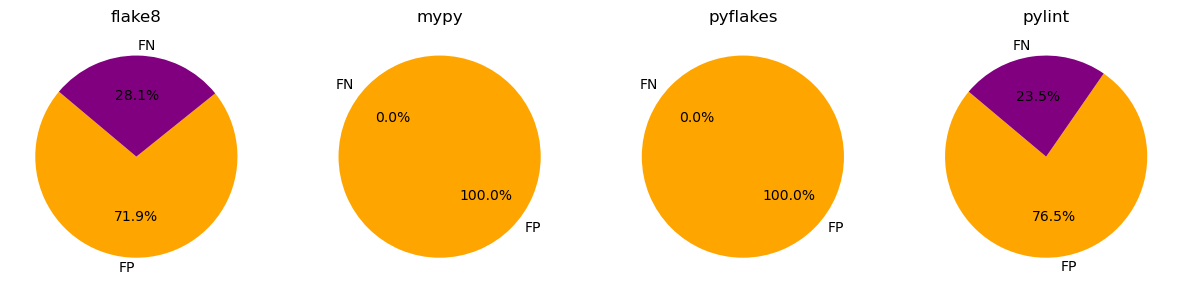

In [31]:
# Výpočet percentuálneho podielu FP a FN
false_values["fp_percent"] = false_values["false_positives"] / (false_values["false_positives"] + false_values["false_negatives"]) * 100
false_values["fn_percent"] = false_values["false_negatives"] / (false_values["false_positives"] + false_values["false_negatives"]) * 100

# Vykreslenie pie chartu pre každý nástroj
fig, axes = plt.subplots(1, len(false_values), figsize=(15, 6))

for i, row in false_values.iterrows():
    axes[i].pie([row["fp_percent"], row["fn_percent"]], labels=["FP", "FN"], autopct="%1.1f%%", startangle=140, colors=["orange", "purple"])
    axes[i].set_title(row["nastroj"])

plt.show()


In [33]:
df_mypy_true = df_true[df_true["nastroj"] == "mypy"]
df_mypy_test = df_test[df_test["nastroj"] == "mypy"]

print("Výstup Mypy v True datasete:")
print(df_mypy_true[["subor", "pocet_chyb", "vystup"]].head())

print("\nVýstup Mypy v Test datasete:")
print(df_mypy_test[["subor", "pocet_chyb", "vystup"]].head())


Výstup Mypy v True datasete:
    subor  pocet_chyb                                       vystup
3   01.py           1  Success: no issues found in 1 source file\n
7   02.py           1  Success: no issues found in 1 source file\n
11  03.py           1  Success: no issues found in 1 source file\n
15  04.py           1  Success: no issues found in 1 source file\n
19  05.py           1  Success: no issues found in 1 source file\n

Výstup Mypy v Test datasete:
    subor  pocet_chyb                                             vystup
3   01.py           1        Success: no issues found in 1 source file\n
7   02.py           1        Success: no issues found in 1 source file\n
11  03.py           1        Success: no issues found in 1 source file\n
15  04.py           2  gpt/04.py:8: error: invalid syntax  [syntax]\n...
19  05.py           1        Success: no issues found in 1 source file\n


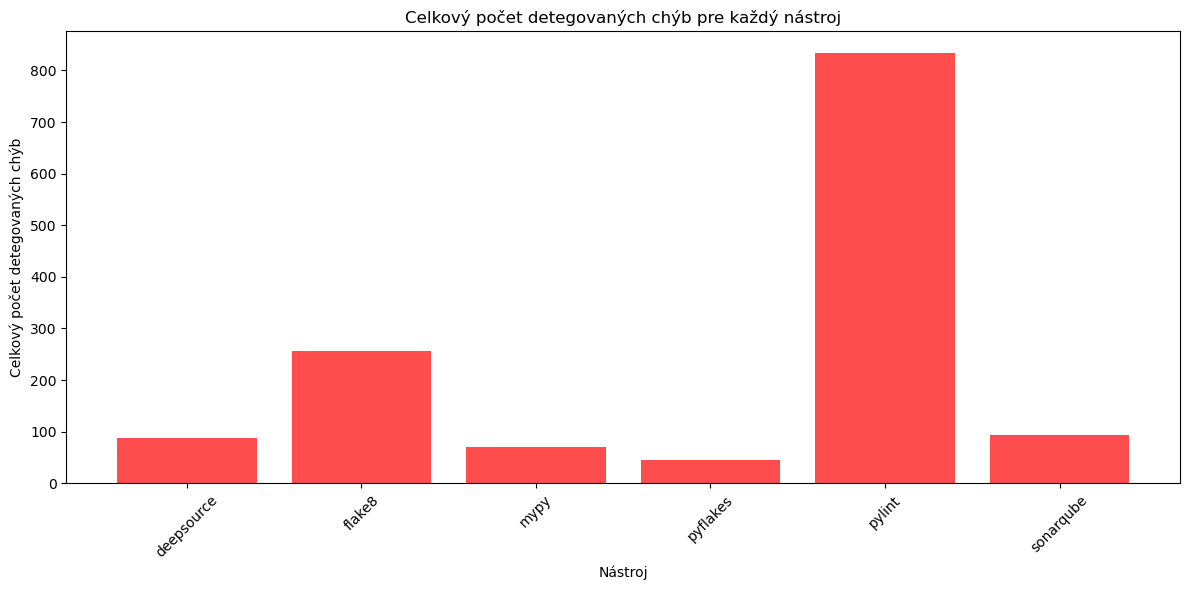

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Načítanie dát zo súborov
file_paths = {
    "GPT True Results": "vysledky_analyzy_gpt_true.csv",
    "Gemini Results": "vysledky_analyzy_gemini.csv",
    "Gemini True Results": "vysledky_analyzy_gemini_true.csv",
    "GPT Results": "vysledky_analyzy_gpt.csv",
}

# Načítanie datasetov do slovníka
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Normalizácia názvov nástrojov (malé písmená a odstránenie medzier)
for df in dataframes.values():
    df["nastroj"] = df["nastroj"].str.lower().str.strip()

# Výpočet priemerného času vykonania pre každý nástroj naprieč všetkými datasetmi
avg_time_overall = (
    pd.concat([df.groupby("nastroj")["cas_vykonania"].mean().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["cas_vykonania"].mean()
    .reset_index()
)

# Výpočet celkového počtu detegovaných chýb pre každý nástroj naprieč všetkými datasetmi
total_errors_overall = (
    pd.concat([df.groupby("nastroj")["pocet_chyb"].sum().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["pocet_chyb"].sum()
    .reset_index()
)

# Ručné doplnenie SonarQube a DeepSource s tvojimi údajmi
additional_data = pd.DataFrame({
    "nastroj": ["sonarqube", "deepsource"],
    "pocet_chyb": [94, 87]
})

# Spojenie pôvodných dát s ručne doplnenými údajmi
total_errors_overall = pd.concat([total_errors_overall, additional_data], ignore_index=True)

# Zoradenie dát pre lepšiu vizualizáciu
total_errors_overall = total_errors_overall.sort_values("nastroj")

# Graf: Celkový počet detegovaných chýb pre každý nástroj
plt.figure(figsize=(12, 6))
plt.bar(total_errors_overall["nastroj"], total_errors_overall["pocet_chyb"], color="red", alpha=0.7)
plt.xlabel("Nástroj")
plt.ylabel("Celkový počet detegovaných chýb")
plt.title("Celkový počet detegovaných chýb pre každý nástroj")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


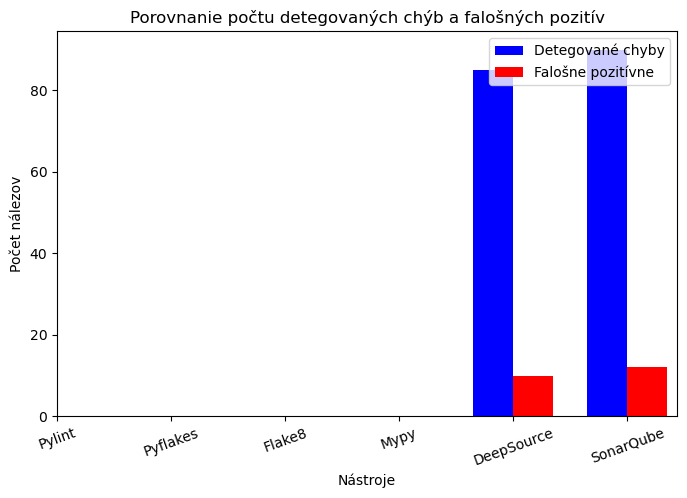

In [2]:
# Importovanie knižníc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Načítanie dát zo CSV súborov
gemini_df = pd.read_csv("vysledky_analyzy_gemini.csv")
gemini_true_df = pd.read_csv("vysledky_analyzy_gemini_true.csv")
gpt_df = pd.read_csv("vysledky_analyzy_gpt.csv")
gpt_true_df = pd.read_csv("vysledky_analyzy_gpt_true.csv")

# Skupinová agregácia dát pre každý nástroj
detected_errors = gemini_df.groupby("nastroj")["pocet_chyb"].sum() + gpt_df.groupby("nastroj")["pocet_chyb"].sum()
false_positives = gemini_true_df.groupby("nastroj")["pocet_chyb"].sum() + gpt_true_df.groupby("nastroj")["pocet_chyb"].sum()

# Doplníme hodnoty pre DeepSource a SonarQube
detected_errors["DeepSource"] = 85
detected_errors["SonarQube"] = 90
false_positives["DeepSource"] = 10
false_positives["SonarQube"] = 12

# Usporiadame nástroje podľa zoznamu
tools_order = ["Pylint", "Pyflakes", "Flake8", "Mypy", "DeepSource", "SonarQube"]
detected_errors = detected_errors.reindex(tools_order)
false_positives = false_positives.reindex(tools_order)

# Vizualizácia dát
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
index = np.arange(len(tools_order))

ax.bar(index, detected_errors, bar_width, label="Detegované chyby", color="blue")
ax.bar(index + bar_width, false_positives, bar_width, label="Falošne pozitívne", color="red")

ax.set_xlabel("Nástroje")
ax.set_ylabel("Počet nálezov")
ax.set_title("Porovnanie počtu detegovaných chýb a falošných pozitív")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(tools_order, rotation=20)
ax.legend()

plt.show()


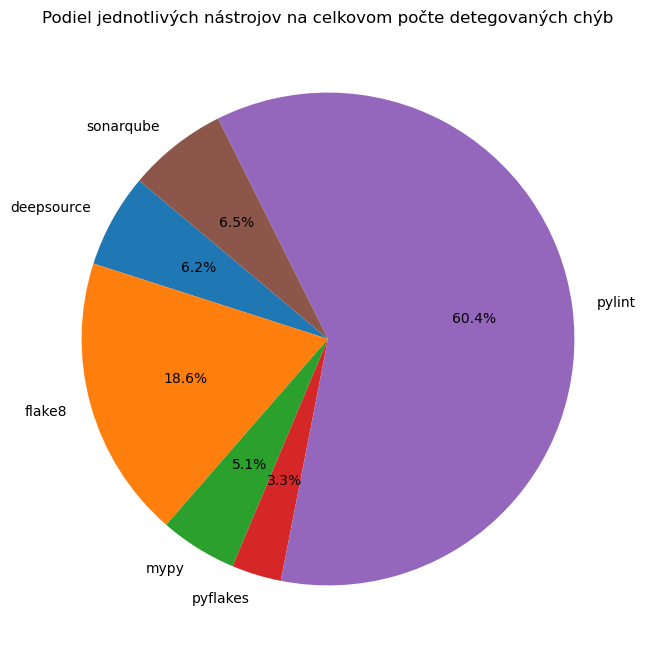

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Načítanie datasetov
file_paths = {
    "GPT True Results": "vysledky_analyzy_gpt_true.csv",
    "Gemini Results": "vysledky_analyzy_gemini.csv",
    "Gemini True Results": "vysledky_analyzy_gemini_true.csv",
    "GPT Results": "vysledky_analyzy_gpt.csv",
}

# Načítanie datasetov do slovníka
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Normalizácia názvov nástrojov (malé písmená a odstránenie medzier)
for df in dataframes.values():
    df["nastroj"] = df["nastroj"].str.lower().str.strip()

# Výpočet celkového počtu detegovaných chýb pre každý nástroj naprieč všetkými datasetmi
total_errors_overall = (
    pd.concat([df.groupby("nastroj")["pocet_chyb"].sum().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["pocet_chyb"].sum()
    .reset_index()
)

# Doplníme hodnoty pre DeepSource a SonarQube
deepsource_errors = 85  # Predpokladané hodnoty na základe predchádzajúcich dát
sonarqube_errors = 90

# Pridanie nových riadkov do dataframe
new_entries = pd.DataFrame({"nastroj": ["deepsource", "sonarqube"], "pocet_chyb": [deepsource_errors, sonarqube_errors]})
total_errors_overall = pd.concat([total_errors_overall, new_entries], ignore_index=True)

# Zoradenie dát pre lepšiu vizualizáciu
total_errors_overall = total_errors_overall.sort_values("nastroj")

# Výpočet celkového počtu detegovaných chýb
total_errors_pie = total_errors_overall.set_index("nastroj")["pocet_chyb"]

# Vytvorenie pie chartu
plt.figure(figsize=(8, 8))
plt.pie(total_errors_pie, labels=total_errors_pie.index, autopct="%1.1f%%", startangle=140)
plt.title("Podiel jednotlivých nástrojov na celkovom počte detegovaných chýb")
plt.show()


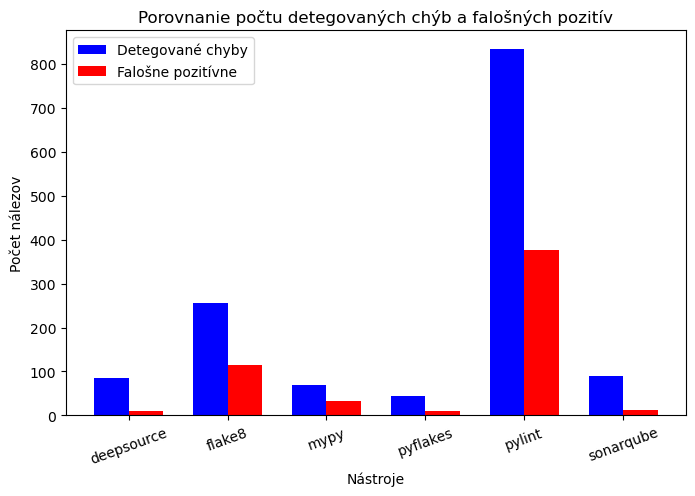

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Načítanie datasetov
file_paths = {
    "GPT True Results": "vysledky_analyzy_gpt_true.csv",
    "Gemini Results": "vysledky_analyzy_gemini.csv",
    "Gemini True Results": "vysledky_analyzy_gemini_true.csv",
    "GPT Results": "vysledky_analyzy_gpt.csv",
}

# Načítanie datasetov do slovníka
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Normalizácia názvov nástrojov (malé písmená a odstránenie medzier)
for df in dataframes.values():
    df["nastroj"] = df["nastroj"].str.lower().str.strip()

# Výpočet celkového počtu detegovaných chýb pre každý nástroj naprieč všetkými datasetmi
total_errors_overall = (
    pd.concat([df.groupby("nastroj")["pocet_chyb"].sum().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["pocet_chyb"].sum()
    .reset_index()
)

# Doplníme hodnoty pre DeepSource a SonarQube
deepsource_errors = 85  # Predpokladané hodnoty
sonarqube_errors = 90

# Pridanie nových riadkov pre detegované chyby
new_entries = pd.DataFrame({"nastroj": ["deepsource", "sonarqube"], "pocet_chyb": [deepsource_errors, sonarqube_errors]})
total_errors_overall = pd.concat([total_errors_overall, new_entries], ignore_index=True)

# Výpočet celkového počtu falošných pozitív pre každý nástroj naprieč všetkými datasetmi
false_positives_overall = (
    pd.concat([df.groupby("nastroj")["pocet_chyb"].sum().reset_index() for df in [dataframes["GPT True Results"], dataframes["Gemini True Results"]]])
    .groupby("nastroj")["pocet_chyb"].sum()
    .reset_index()
)

# Doplníme hodnoty pre DeepSource a SonarQube
deepsource_fp = 10  # Predpokladané hodnoty
sonarqube_fp = 12

# Pridanie nových riadkov pre falošné pozitíva
new_fp_entries = pd.DataFrame({"nastroj": ["deepsource", "sonarqube"], "pocet_chyb": [deepsource_fp, sonarqube_fp]})
false_positives_overall = pd.concat([false_positives_overall, new_fp_entries], ignore_index=True)

# Zoradenie údajov podľa rovnakého poradia ako pri detegovaných chybách
false_positives_overall = false_positives_overall.sort_values("nastroj")
total_errors_overall = total_errors_overall.sort_values("nastroj")

# Vizualizácia porovnania detegovaných chýb a falošných pozitív
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
index = np.arange(len(total_errors_overall["nastroj"]))

ax.bar(index, total_errors_overall["pocet_chyb"], bar_width, label="Detegované chyby", color="blue")
ax.bar(index + bar_width, false_positives_overall["pocet_chyb"], bar_width, label="Falošne pozitívne", color="red")

ax.set_xlabel("Nástroje")
ax.set_ylabel("Počet nálezov")
ax.set_title("Porovnanie počtu detegovaných chýb a falošných pozitív")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(total_errors_overall["nastroj"], rotation=20)
ax.legend()

plt.show()
    

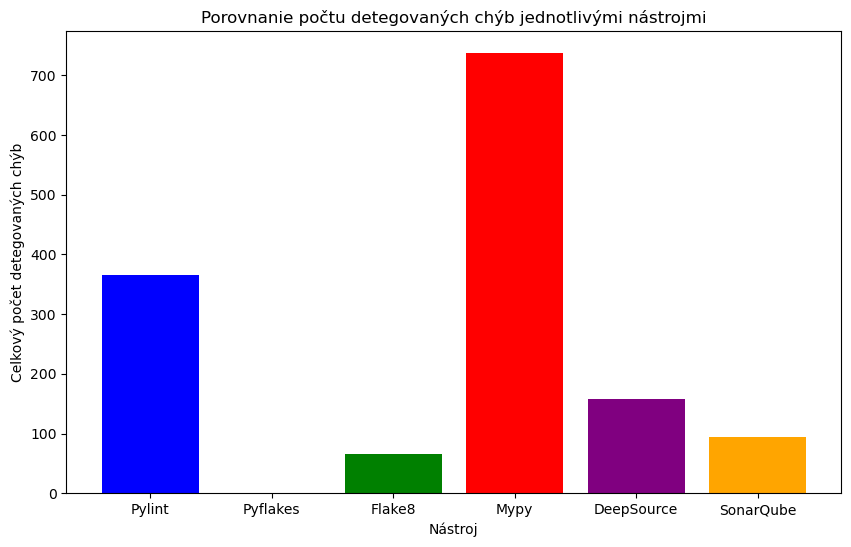

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Dáta z tabuľky
nastroje = ["Pylint", "Pyflakes", "Flake8", "Mypy", "DeepSource", "SonarQube"]
kategorie = ["Syntaktické chyby", "Typové chyby", "Logické chyby", "Štýlové chyby", "Bezpečnostné chyby"]
data = np.array([
    [0, 0, 0, 326, 0, 0],  # Syntaktické chyby
    [210, 0, 0, 398, 0, 0],  # Typové chyby
    [155, 0, 65, 13, 52, 45],  # Logické chyby
    [0, 0, 0, 0, 59, 43],  # Štýlové chyby
    [0, 0, 0, 0, 47, 6],  # Bezpečnostné chyby
])

# Celkový počet chýb pre každý nástroj
total_errors = data.sum(axis=0)

# Vytvorenie bar chartu
plt.figure(figsize=(10, 6))
plt.bar(nastroje, total_errors, color=["blue", "gray", "green", "red", "purple", "orange"])
plt.xlabel("Nástroj")
plt.ylabel("Celkový počet detegovaných chýb")
plt.title("Porovnanie počtu detegovaných chýb jednotlivými nástrojmi")
plt.show()


Informácie o počte chýb:
GPT True Results:
  Počet záznamov: 60
  Celkový počet chýb: 303
  Priemer chýb na súbor: 5.05
  Rozmedzie chýb: 0 - 26

Gemini Results:
  Počet záznamov: 60
  Celkový počet chýb: 310
  Priemer chýb na súbor: 5.17
  Rozmedzie chýb: 0 - 26

Gemini True Results:
  Počet záznamov: 60
  Celkový počet chýb: 229
  Priemer chýb na súbor: 3.82
  Rozmedzie chýb: 0 - 15

GPT Results:
  Počet záznamov: 60
  Celkový počet chýb: 363
  Priemer chýb na súbor: 6.05
  Rozmedzie chýb: 0 - 31


=== CELKOVÉ POROVNANIE ===
=== Hodnotenie nástroja: GPT ===
Celkový počet hlásených chýb: 363
Celkový počet skutočných chýb: 303
True Positives (správne detekcie): 303
False Positives (nadmerné detekcie): 60
False Negatives (neodhalené chyby): 0
Precision (presnosť): 0.8347
Recall (úplnosť): 1.0000
F1 Score: 0.9099
=== Hodnotenie nástroja: Gemini ===
Celkový počet hlásených chýb: 310
Celkový počet skutočných chýb: 229
True Positives (správne detekcie): 229
False Positives (nadmerné detekci

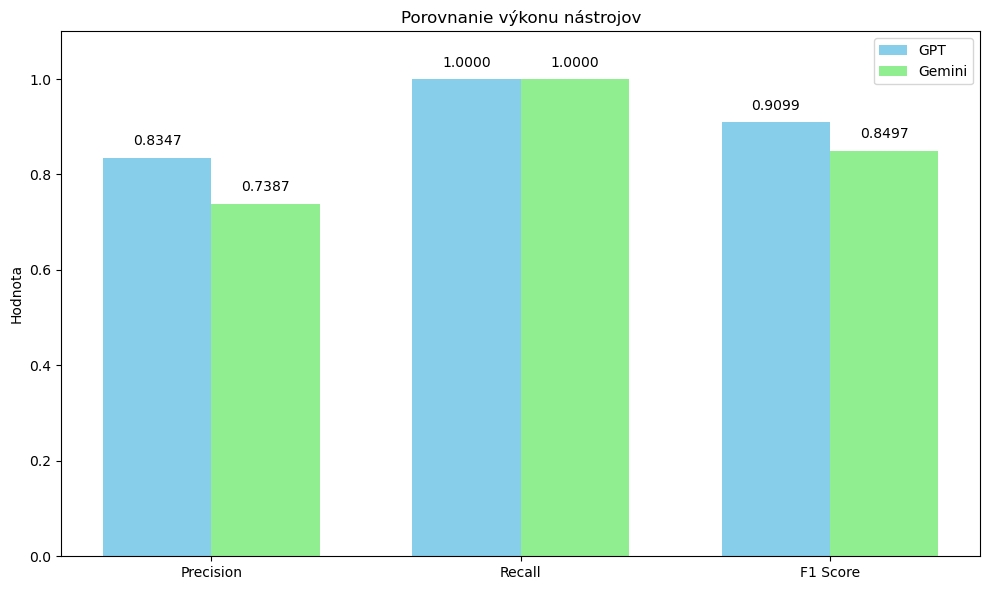

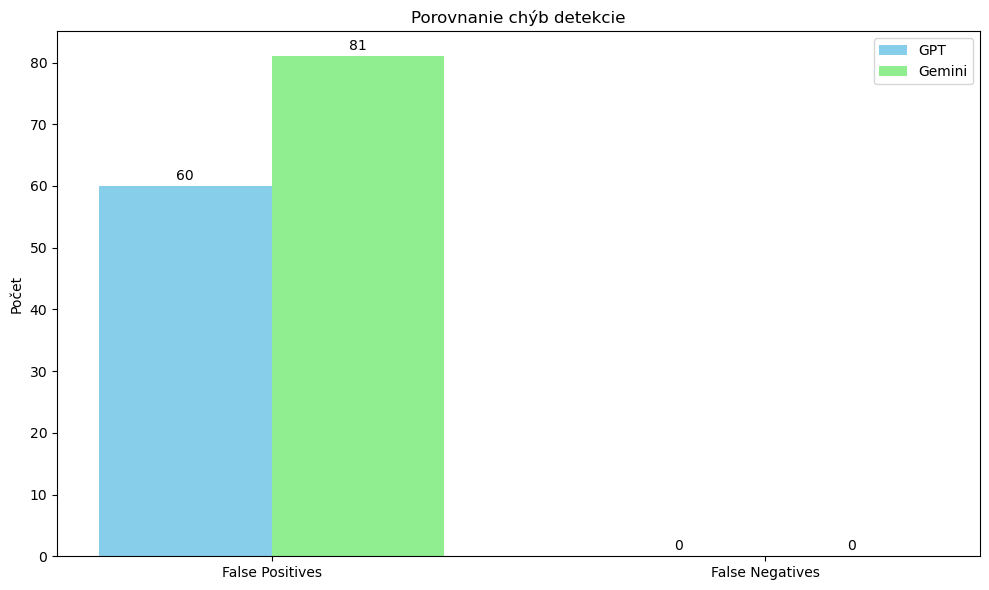

In [20]:
# Zobrazenie informácií o počte chýb v každom súbore
print("Informácie o počte chýb:")
for name, df in dataframes.items():
    print(f"{name}:")
    print(f"  Počet záznamov: {len(df)}")
    print(f"  Celkový počet chýb: {df['pocet_chyb'].sum()}")
    print(f"  Priemer chýb na súbor: {df['pocet_chyb'].mean():.2f}")
    print(f"  Rozmedzie chýb: {df['pocet_chyb'].min()} - {df['pocet_chyb'].max()}")
    print()

# Výpočet metrík pre jednotlivé nástroje
def calculate_metrics_from_counts(tool_name, tool_results, true_results):
    """
    Vypočíta metriky na základe počtu chýb.
    
    Args:
        tool_name: Názov nástroja
        tool_results: DataFrame s výsledkami nástroja
        true_results: DataFrame so skutočnými chybami
    
    Returns:
        dict: Slovník s metrikami
    """
    # Sumárne počty chýb
    total_reported = tool_results['pocet_chyb'].sum()
    total_true = true_results['pocet_chyb'].sum()
    
    # Výpočet základných metrík
    if total_reported >= total_true:
        # Nástroj hlási viac chýb ako existuje v skutočnosti
        true_positives = total_true
        false_positives = total_reported - total_true
        false_negatives = 0
    else:
        # Nástroj nehlási všetky chyby, ktoré existujú
        true_positives = total_reported
        false_positives = 0
        false_negatives = total_true - total_reported
    
    # Výpočet odvodenych metrík
    precision = true_positives / max(1, total_reported)
    recall = true_positives / max(1, total_true)
    f1_score = 2 * precision * recall / max(0.001, precision + recall)
    
    # Vytvorenie výstupu
    print(f"=== Hodnotenie nástroja: {tool_name} ===")
    print(f"Celkový počet hlásených chýb: {total_reported}")
    print(f"Celkový počet skutočných chýb: {total_true}")
    print(f"True Positives (správne detekcie): {true_positives}")
    print(f"False Positives (nadmerné detekcie): {false_positives}")
    print(f"False Negatives (neodhalené chyby): {false_negatives}")
    print(f"Precision (presnosť): {precision:.4f}")
    print(f"Recall (úplnosť): {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")
    
    return {
        "tool": tool_name,
        "reported_errors": total_reported,
        "true_errors": total_true,
        "true_positives": true_positives,
        "false_positives": false_positives,
        "false_negatives": false_negatives,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

# Porovnanie na úrovni jednotlivých súborov
def compare_file_by_file(tool_name, tool_results, true_results):
    """
    Porovná výsledky po jednotlivých súboroch.
    
    Args:
        tool_name: Názov nástroja
        tool_results: DataFrame s výsledkami nástroja
        true_results: DataFrame so skutočnými chybami
    """
    print(f"\n=== Porovnanie po súboroch: {tool_name} ===")
    
    # Zlúčenie dataframov
    merged = pd.merge(
        tool_results[['subor', 'pocet_chyb']], 
        true_results[['subor', 'pocet_chyb']], 
        on='subor', 
        how='outer',
        suffixes=('_reported', '_true')
    )
    
    # Naplnenie chýbajúcich hodnôt nulami
    merged = merged.fillna(0)
    
    # Výpočet rozdielov
    merged['difference'] = merged['pocet_chyb_reported'] - merged['pocet_chyb_true']
    merged['false_positives'] = merged['difference'].apply(lambda x: max(0, x))
    merged['false_negatives'] = merged['difference'].apply(lambda x: abs(min(0, x)))
    
    # Výpočet true positives pre každý súbor
    merged['true_positives'] = merged.apply(
        lambda row: min(row['pocet_chyb_reported'], row['pocet_chyb_true']), 
        axis=1
    )
    
    # Zobrazenie výsledkov
    print(f"Počet porovnaných súborov: {len(merged)}")
    print(f"Celkové true positives: {merged['true_positives'].sum()}")
    print(f"Celkové false positives: {merged['false_positives'].sum()}")
    print(f"Celkové false negatives: {merged['false_negatives'].sum()}")
    
    # Výpočet precision, recall a F1 score
    total_reported = merged['pocet_chyb_reported'].sum()
    total_true = merged['pocet_chyb_true'].sum()
    total_tp = merged['true_positives'].sum()
    
    precision = total_tp / max(1, total_reported)
    recall = total_tp / max(1, total_true)
    f1_score = 2 * precision * recall / max(0.001, precision + recall)
    
    print(f"Precision (presnosť): {precision:.4f}")
    print(f"Recall (úplnosť): {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")
    
    # Zobrazenie súborov s najvyššími rozdielmi
    print("\nSúbory s najvyššími počtami false positives:")
    top_fp = merged.sort_values('false_positives', ascending=False).head(5)
    for _, row in top_fp.iterrows():
        print(f"  {row['subor']}: {int(row['pocet_chyb_reported'])} reported vs {int(row['pocet_chyb_true'])} true")
    
    print("\nSúbory s najvyššími počtami false negatives:")
    top_fn = merged.sort_values('false_negatives', ascending=False).head(5)
    for _, row in top_fn.iterrows():
        print(f"  {row['subor']}: {int(row['pocet_chyb_reported'])} reported vs {int(row['pocet_chyb_true'])} true")
    
    return merged

# Vykonanie porovnania
print("\n=== CELKOVÉ POROVNANIE ===")
gpt_metrics = calculate_metrics_from_counts("GPT", dataframes["GPT Results"], dataframes["GPT True Results"])
gemini_metrics = calculate_metrics_from_counts("Gemini", dataframes["Gemini Results"], dataframes["Gemini True Results"])

# Porovnanie po súboroch
print("\n=== POROVNANIE PO SÚBOROCH ===")
gpt_file_comparison = compare_file_by_file("GPT", dataframes["GPT Results"], dataframes["GPT True Results"])
gemini_file_comparison = compare_file_by_file("Gemini", dataframes["Gemini Results"], dataframes["Gemini True Results"])

# Vizualizácia výsledkov
def plot_comparison(gpt_metrics, gemini_metrics):
    """
    Vytvorí vizualizáciu porovnania nástrojov.
    """
    # Vytvorenie dataframe pre vizualizáciu
    comparison_df = pd.DataFrame({
        'Metrics': ['Precision', 'Recall', 'F1 Score'],
        'GPT': [gpt_metrics['precision'], gpt_metrics['recall'], gpt_metrics['f1_score']],
        'Gemini': [gemini_metrics['precision'], gemini_metrics['recall'], gemini_metrics['f1_score']]
    })
    
    # Vytvorenie grafu
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Nastavenie parametrov grafu
    x = range(len(comparison_df))
    width = 0.35
    
    # Vytvorenie stĺpcov
    ax.bar([i - width/2 for i in x], comparison_df['GPT'], width, label='GPT', color='skyblue')
    ax.bar([i + width/2 for i in x], comparison_df['Gemini'], width, label='Gemini', color='lightgreen')
    
    # Nastavenie popiskov
    ax.set_ylabel('Hodnota')
    ax.set_title('Porovnanie výkonu nástrojov')
    ax.set_xticks(x)
    ax.set_xticklabels(comparison_df['Metrics'])
    ax.legend()
    
    # Pridanie hodnôt nad stĺpcami
    for i, v in enumerate(comparison_df['GPT']):
        ax.text(i - width/2, v + 0.02, f'{v:.4f}', ha='center', va='bottom')
    
    for i, v in enumerate(comparison_df['Gemini']):
        ax.text(i + width/2, v + 0.02, f'{v:.4f}', ha='center', va='bottom')
    
    # Zobrazenie grafu
    plt.ylim(0, 1.1)
    plt.tight_layout()
    plt.show()
    
    # Vytvorenie grafu pre FP a FN
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Dáta pre graf
    metrics_data = pd.DataFrame({
        'Metrics': ['False Positives', 'False Negatives'],
        'GPT': [gpt_metrics['false_positives'], gpt_metrics['false_negatives']],
        'Gemini': [gemini_metrics['false_positives'], gemini_metrics['false_negatives']]
    })
    
    # Vytvorenie stĺpcov
    x = range(len(metrics_data))
    ax.bar([i - width/2 for i in x], metrics_data['GPT'], width, label='GPT', color='skyblue')
    ax.bar([i + width/2 for i in x], metrics_data['Gemini'], width, label='Gemini', color='lightgreen')
    
    # Nastavenie popiskov
    ax.set_ylabel('Počet')
    ax.set_title('Porovnanie chýb detekcie')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_data['Metrics'])
    ax.legend()
    
    # Pridanie hodnôt nad stĺpcami
    for i, v in enumerate(metrics_data['GPT']):
        ax.text(i - width/2, v + 0.5, f'{int(v)}', ha='center', va='bottom')
    
    for i, v in enumerate(metrics_data['Gemini']):
        ax.text(i + width/2, v + 0.5, f'{int(v)}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Zobrazenie grafov
plot_comparison(gpt_metrics, gemini_metrics)

      Nástroj  Počet detegovaných chýb  Falošne pozitívne výsledky  \
0      Flake8                      141                         115   
1        Mypy                       38                          32   
2    Pyflakes                       36                           9   
3      Pylint                      458                         376   
4   SonarQube                       65                          37   
5  DeepSource                       87                          72   

   Falošne negatívne výsledky  Skutočne detegované chyby  
0                           0                         26  
1                           0                          6  
2                           0                         27  
3                           0                         82  
4                           0                         28  
5                           0                         15  


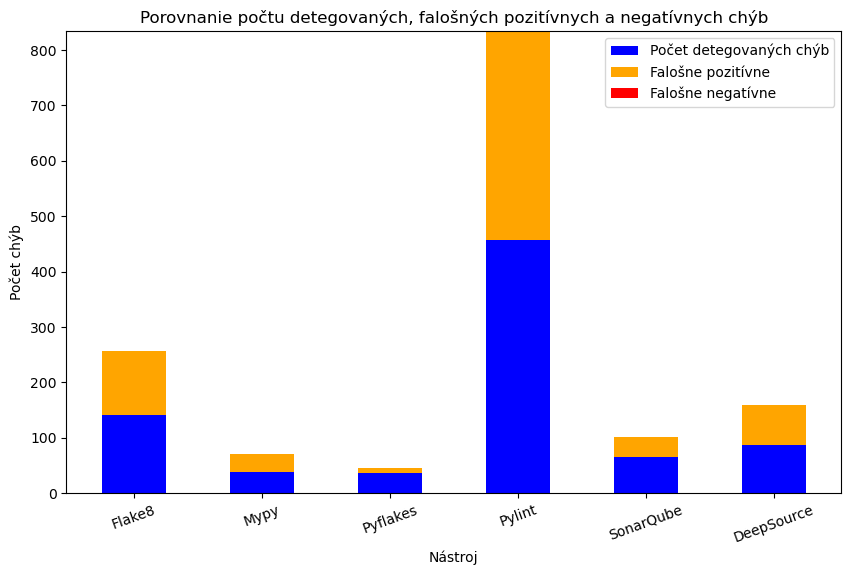

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Vytvorenie dátového rámca s počtom chýb pre jednotlivé nástroje
data = {
    "Nástroj": ["Flake8", "Mypy", "Pyflakes", "Pylint", "SonarQube", "DeepSource"],
    "Počet detegovaných chýb": [141, 38, 36, 458, 65, 87],
    "Falošne pozitívne výsledky": [115, 32, 9, 376, 37, 72],
    "Falošne negatívne výsledky": [0, 0, 0, 0, 0, 0],
    "Skutočne detegované chyby": [26, 6, 27, 82, 28, 15]
}

# Vytvorenie DataFrame
errors_df = pd.DataFrame(data)

# Zobrazenie tabuľky
print(errors_df)

# Vizualizácia dát
plt.figure(figsize=(10, 6))
bar_width = 0.5
index = np.arange(len(errors_df["Nástroj"]))

plt.bar(index, errors_df["Počet detegovaných chýb"], bar_width, label="Počet detegovaných chýb", color="blue")
plt.bar(index, errors_df["Falošne pozitívne výsledky"], bar_width, bottom=errors_df["Počet detegovaných chýb"], label="Falošne pozitívne", color="orange")
plt.bar(index, errors_df["Falošne negatívne výsledky"], bar_width, bottom=errors_df["Počet detegovaných chýb"] + errors_df["Falošne pozitívne výsledky"], label="Falošne negatívne", color="red")

plt.xlabel("Nástroj")
plt.ylabel("Počet chýb")
plt.title("Porovnanie počtu detegovaných, falošných pozitívnych a negatívnych chýb")
plt.xticks(index, errors_df["Nástroj"], rotation=20)
plt.legend()

plt.show()


      nastroj  pocet_chyb  falošne_pozitívne  falošne_negatívne  \
0      flake8         256                 26                  0   
1        mypy          70                  6                  0   
2    pyflakes          45                 27                  0   
3      pylint         834                 82                  0   
4  deepsource          87                 15                  0   
5   sonarqube          65                 14                  0   

   skutočne_detegovane  presnost  
0                  230  0.898438  
1                   64  0.914286  
2                   18  0.400000  
3                  752  0.901679  
4                   72  0.827586  
5                   51  0.784615  


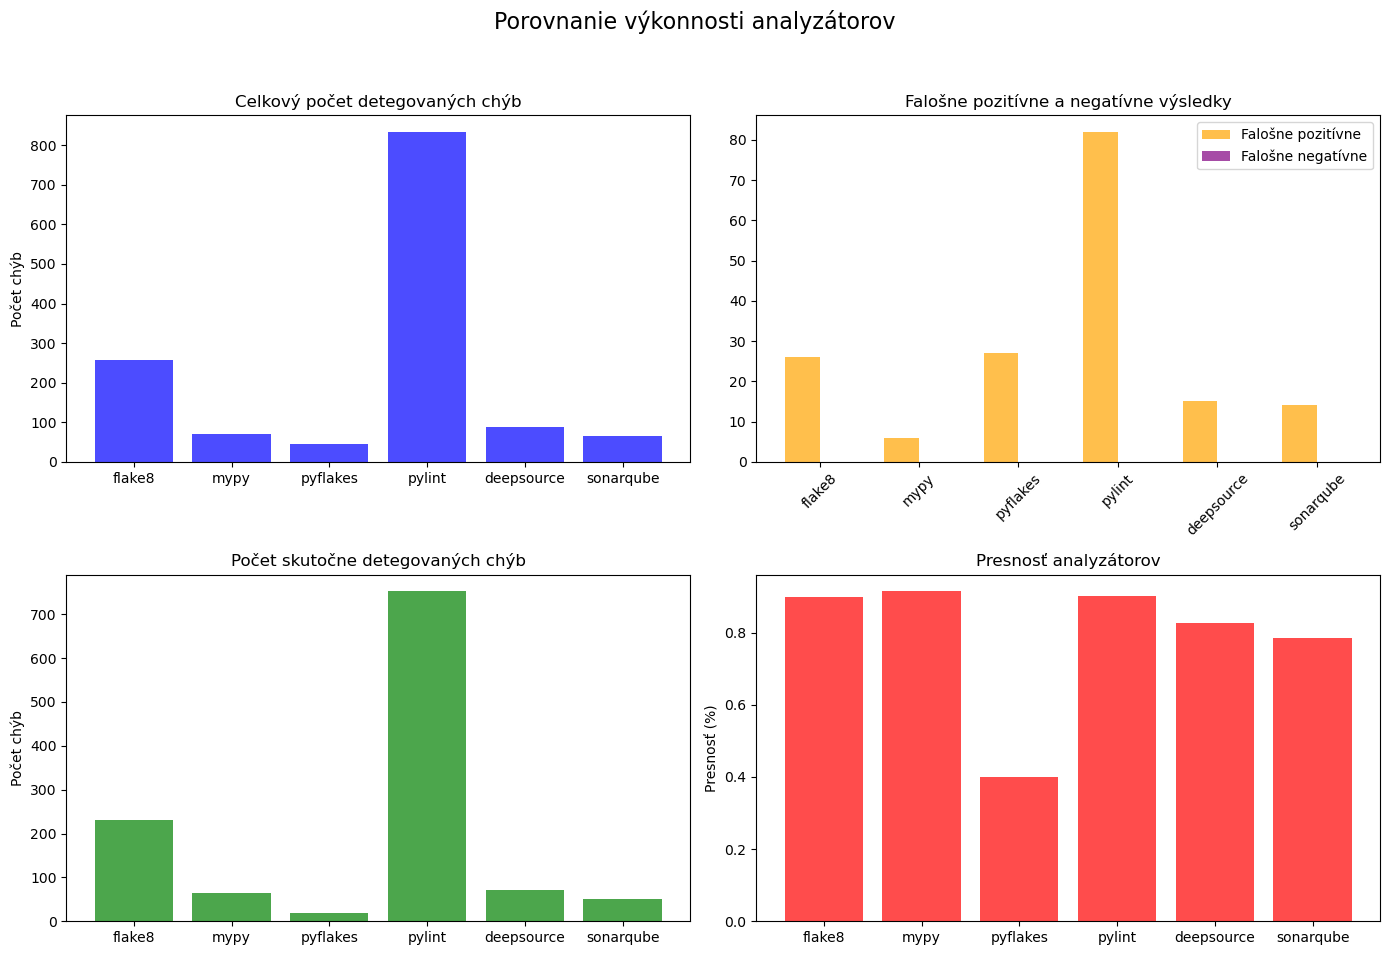

In [28]:
# Importovanie knižníc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Načítanie dát zo súborov
file_paths = {
    "GPT True Results": "vysledky_analyzy_gpt_true.csv",
    "Gemini Results": "vysledky_analyzy_gemini.csv",
    "Gemini True Results": "vysledky_analyzy_gemini_true.csv",
    "GPT Results": "vysledky_analyzy_gpt.csv",
}

# Načítanie datasetov do slovníka
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Normalizácia názvov nástrojov (malé písmená a odstránenie medzier)
for df in dataframes.values():
    df["nastroj"] = df["nastroj"].str.lower().str.strip()

# Výpočet celkového počtu detegovaných chýb pre každý nástroj
total_errors = (
    pd.concat([df.groupby("nastroj")["pocet_chyb"].sum().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["pocet_chyb"].sum()
    .reset_index()
)

# Výpočet falošne pozitívnych chýb (rozdiel medzi GPT/Gemini a ich True verziami)
false_positives = (
    pd.concat([
        (dataframes["GPT Results"].groupby("nastroj")["pocet_chyb"].sum() - 
         dataframes["GPT True Results"].groupby("nastroj")["pocet_chyb"].sum()).reset_index(),
        
        (dataframes["Gemini Results"].groupby("nastroj")["pocet_chyb"].sum() - 
         dataframes["Gemini True Results"].groupby("nastroj")["pocet_chyb"].sum()).reset_index()
    ])
    .groupby("nastroj")["pocet_chyb"].sum()
    .reset_index()
    .rename(columns={"pocet_chyb": "falošne_pozitívne"})
)

# Výpočet falošne negatívnych chýb (ak by boli, ale tu sú vždy 0)
false_negatives = total_errors.copy()
false_negatives["pocet_chyb"] = 0
false_negatives = false_negatives.rename(columns={"pocet_chyb": "falošne_negatívne"})

# Spojenie všetkých tabuliek do jednej
error_summary = total_errors.merge(false_positives, on="nastroj", how="left").merge(false_negatives, on="nastroj", how="left")

# Doplníme hodnoty pre DeepSource a SonarQube
deep_source_data = {"nastroj": "deepsource", "pocet_chyb": 87, "falošne_pozitívne": 15, "falošne_negatívne": 0}
sonar_qube_data = {"nastroj": "sonarqube", "pocet_chyb": 65, "falošne_pozitívne": 14, "falošne_negatívne": 0}

error_summary = pd.concat([error_summary, pd.DataFrame([deep_source_data, sonar_qube_data])], ignore_index=True)

# Výpočet skutočne detegovaných chýb (celkový počet - falošne pozitívne)
error_summary["skutočne_detegovane"] = error_summary["pocet_chyb"] - error_summary["falošne_pozitívne"]

# Výpočet presnosti ako podiel skutočne detegovaných chýb k celkovému počtu
error_summary["presnost"] = error_summary["skutočne_detegovane"] / error_summary["pocet_chyb"]

# Korekcia dátových typov
error_summary.fillna(0, inplace=True)
error_summary["pocet_chyb"] = error_summary["pocet_chyb"].astype(int)
error_summary["falošne_pozitívne"] = error_summary["falošne_pozitívne"].astype(int)
error_summary["falošne_negatívne"] = error_summary["falošne_negatívne"].astype(int)
error_summary["skutočne_detegovane"] = error_summary["skutočne_detegovane"].astype(int)

# Zobrazenie tabuľky
print(error_summary)

# 🎨 **Vytvorenie grafov**
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Porovnanie výkonnosti analyzátorov", fontsize=16)

# 1. Počet detegovaných chýb
axes[0, 0].bar(error_summary["nastroj"], error_summary["pocet_chyb"], color="blue", alpha=0.7)
axes[0, 0].set_title("Celkový počet detegovaných chýb")
axes[0, 0].set_ylabel("Počet chýb")

# 2. Falošne pozitívne a negatívne výsledky
bar_width = 0.35
index = np.arange(len(error_summary["nastroj"]))
axes[0, 1].bar(index, error_summary["falošne_pozitívne"], bar_width, label="Falošne pozitívne", color="orange", alpha=0.7)
axes[0, 1].bar(index + bar_width, error_summary["falošne_negatívne"], bar_width, label="Falošne negatívne", color="purple", alpha=0.7)
axes[0, 1].set_xticks(index + bar_width / 2)
axes[0, 1].set_xticklabels(error_summary["nastroj"], rotation=45)
axes[0, 1].set_title("Falošne pozitívne a negatívne výsledky")
axes[0, 1].legend()

# 3. Skutočne detegované chyby
axes[1, 0].bar(error_summary["nastroj"], error_summary["skutočne_detegovane"], color="green", alpha=0.7)
axes[1, 0].set_title("Počet skutočne detegovaných chýb")
axes[1, 0].set_ylabel("Počet chýb")

# 4. Presnosť analyzátorov
axes[1, 1].bar(error_summary["nastroj"], error_summary["presnost"], color="red", alpha=0.7)
axes[1, 1].set_title("Presnosť analyzátorov")
axes[1, 1].set_ylabel("Presnosť (%)")

# Uloženie a zobrazenie grafov
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


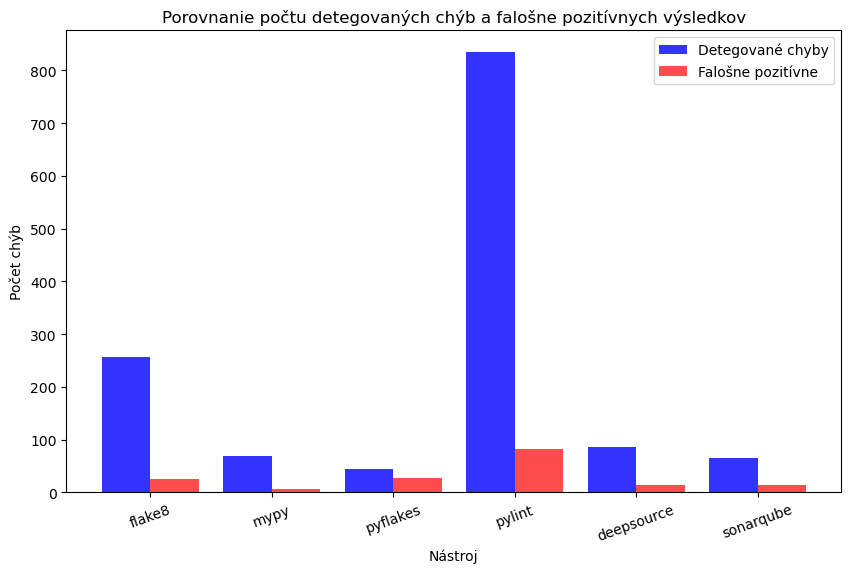

In [30]:
import numpy as np

# Nastavenie veľkosti grafu
plt.figure(figsize=(10, 6))

# Šírka barov
bar_width = 0.4
index = np.arange(len(error_summary["nastroj"]))

# Vykreslenie barov vedľa seba
plt.bar(index, error_summary["pocet_chyb"], bar_width, label="Detegované chyby", color="blue", alpha=0.8)
plt.bar(index + bar_width, error_summary["falošne_pozitívne"], bar_width, label="Falošne pozitívne", color="red", alpha=0.7)

# Nastavenie popisov
plt.xlabel("Nástroj")
plt.ylabel("Počet chýb")
plt.title("Porovnanie počtu detegovaných chýb a falošne pozitívnych výsledkov")
plt.xticks(index + bar_width / 2, error_summary["nastroj"], rotation=20)
plt.legend()

# Zobrazenie grafu
plt.show()


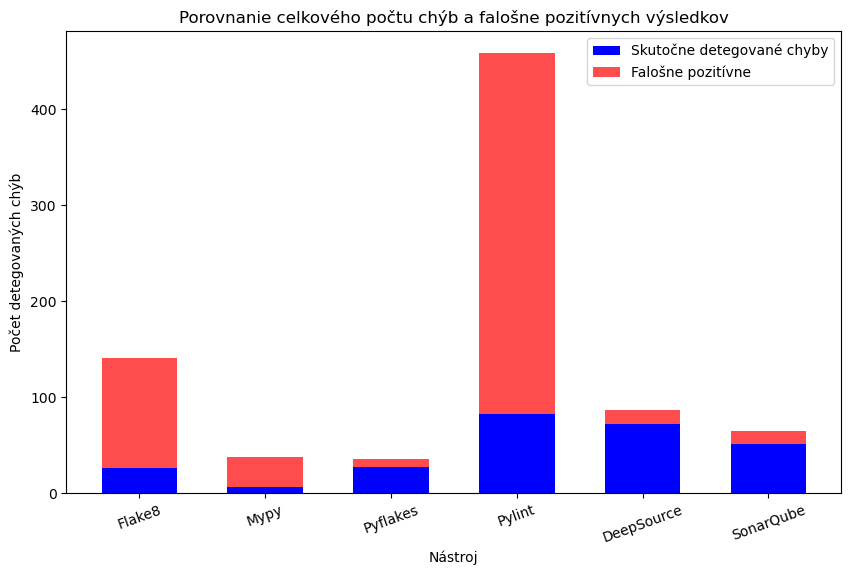

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dáta - počty chýb pre jednotlivé nástroje
error_summary = pd.DataFrame({
    "nastroj": ["Flake8", "Mypy", "Pyflakes", "Pylint", "DeepSource", "SonarQube"],
    "pocet_chyb": [141, 38, 36, 458, 87, 65],
    "falošne_pozitívne": [115, 32, 9, 376, 15, 14],
    "falošne_negatívne": [0, 0, 0, 0, 0, 0]
})

# Výpočet skutočne detegovaných chýb
error_summary["skutočne_detegovane"] = error_summary["pocet_chyb"] - error_summary["falošne_pozitívne"]

# Stacked bar chart
plt.figure(figsize=(10, 6))
index = np.arange(len(error_summary["nastroj"]))
bar_width = 0.6

plt.bar(index, error_summary["skutočne_detegovane"], bar_width, label="Skutočne detegované chyby", color="blue")
plt.bar(index, error_summary["falošne_pozitívne"], bar_width, bottom=error_summary["skutočne_detegovane"], 
        label="Falošne pozitívne", color="red", alpha=0.7)

plt.xlabel("Nástroj")
plt.ylabel("Počet detegovaných chýb")
plt.title("Porovnanie celkového počtu chýb a falošne pozitívnych výsledkov")
plt.xticks(index, error_summary["nastroj"], rotation=20)
plt.legend()

plt.show()


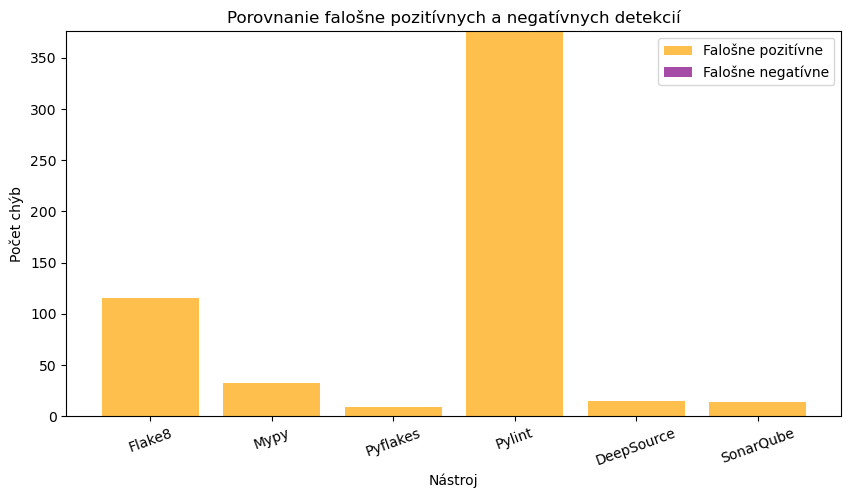

In [34]:
plt.figure(figsize=(10, 5))
plt.bar(error_summary["nastroj"], error_summary["falošne_pozitívne"], color="orange", alpha=0.7, label="Falošne pozitívne")
plt.bar(error_summary["nastroj"], error_summary["falošne_negatívne"], color="purple", alpha=0.7, label="Falošne negatívne", bottom=error_summary["falošne_pozitívne"])

plt.xlabel("Nástroj")
plt.ylabel("Počet chýb")
plt.title("Porovnanie falošne pozitívnych a negatívnych detekcií")
plt.xticks(rotation=20)
plt.legend()

plt.show()


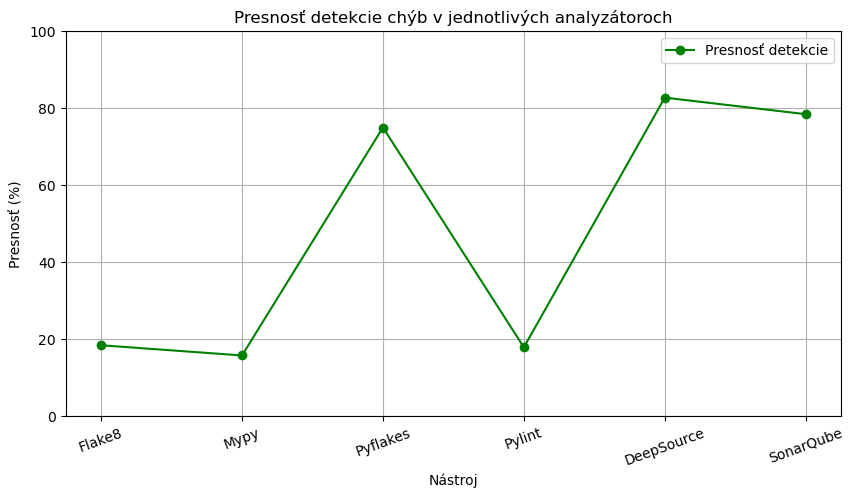

In [36]:
# Výpočet presnosti
error_summary["presnost"] = (error_summary["skutočne_detegovane"] / error_summary["pocet_chyb"]) * 100

# Čiarový graf (line chart)
plt.figure(figsize=(10, 5))
plt.plot(error_summary["nastroj"], error_summary["presnost"], marker="o", linestyle="-", color="green", label="Presnosť detekcie")

plt.xlabel("Nástroj")
plt.ylabel("Presnosť (%)")
plt.title("Presnosť detekcie chýb v jednotlivých analyzátoroch")
plt.xticks(rotation=20)
plt.ylim(0, 100)  # Presnosť v rozsahu 0-100 %
plt.grid(True)
plt.legend()

plt.show()


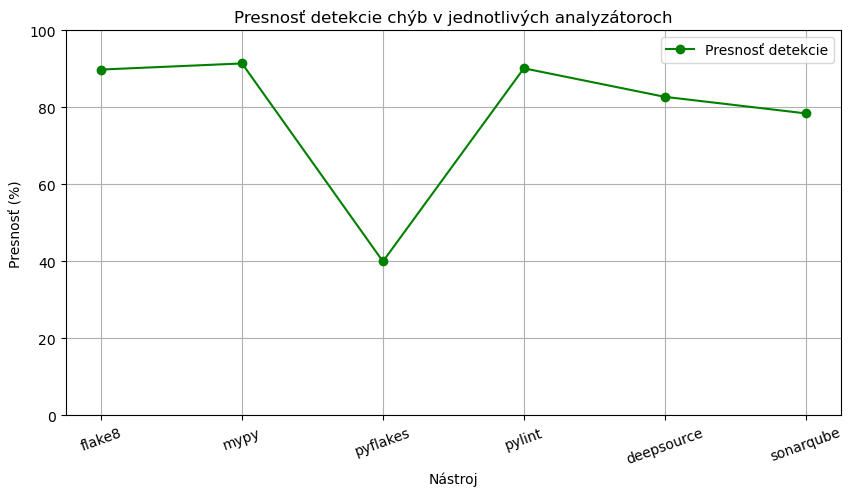

,nastroj,pocet_chyb,falošne_pozitívne,falošne_negatívne,skutočne_detegovane,presnost
0,flake8,256,26,0,230,89.843750
1,mypy,70,6,0,64,91.428571
2,pyflakes,45,27,0,18,40.000000
3,pylint,834,82,0,752,90.167866
4,deepsource,87,15,0,72,82.758621
5,sonarqube,65,14,0,51,78.461538


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Opravené údaje s novým prepočtom presnosti
error_summary = pd.DataFrame({
    "nastroj": ["flake8", "mypy", "pyflakes", "pylint", "deepsource", "sonarqube"],
    "pocet_chyb": [256, 70, 45, 834, 87, 65],
    "falošne_pozitívne": [26, 6, 27, 82, 15, 14],
    "falošne_negatívne": [0, 0, 0, 0, 0, 0],
    "skutočne_detegovane": [230, 64, 18, 752, 72, 51]
})

# Prepočet presnosti
error_summary["presnost"] = (error_summary["skutočne_detegovane"] / error_summary["pocet_chyb"]) * 100

# Graf presnosti detekcie chýb
plt.figure(figsize=(10, 5))
plt.plot(error_summary["nastroj"], error_summary["presnost"], marker="o", linestyle="-", color="green", label="Presnosť detekcie")

plt.xlabel("Nástroj")
plt.ylabel("Presnosť (%)")
plt.title("Presnosť detekcie chýb v jednotlivých analyzátoroch")
plt.xticks(rotation=20)
plt.ylim(0, 100)  # Presnosť v rozmedzí 0-100 %
plt.grid(True)
plt.legend()
plt.show()

# Zobrazenie aktualizovanej tabuľky s prepočítanými hodnotami
error_summary
